In [1]:
# CART决策树：分类树
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler


# 1，加载数据：
def notEmpty(s):
    return s != ''


# 1,加载数据：
def notEmpty(s):
    return s != ''

names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df = pd.read_csv('../DataSets/boston_housing.data', header=None)  # 数据文件格式不统一，所以读取时，先按照一行一个字段属性读取数据，然后再按照每行数据进行处理
data = np.empty((len(df), 14))
for i, d in enumerate(df.values):                      # enumerate生成一列索 引i,d为其元素
    d = map(float, filter(notEmpty, d[0].split(' ')))  # filter一个函数，一个list
    data[i] = list(d)                                  # 根据函数结果是否为真，来过滤list中的项
    

x, y = np.split(data, (13,), axis=1)                   # 分割数据
y = y.ravel()                                          # 转换格式 拉直操作
print (y.shape, x[0:5], y[0:5])
print ("样本数据量:%d, 特征个数： {}, target样本数据量: {}".format(x.shape,y.shape[0]))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)  # 分割数据

ss = MinMaxScaler()   # 数据归一化
x_train = ss.fit_transform(x_train, y_train)
x_test = ss.transform(x_test)

(506,) [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]] [24.  21.6 34.7 33.4 36.2]
样本数据量:%d, 特征个数： (506, 13), target样本数据量: 506


In [2]:
# 2，构建CART回归树：
model = DecisionTreeRegressor(criterion='mse',max_depth=6)  # 可选criterion='mae';"mse";"friedman_mse":measure the quality of a split
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)   # 预测

score = model.score(x_test, y_test)
print ("Score：", score)

Score： 0.5399290015479237


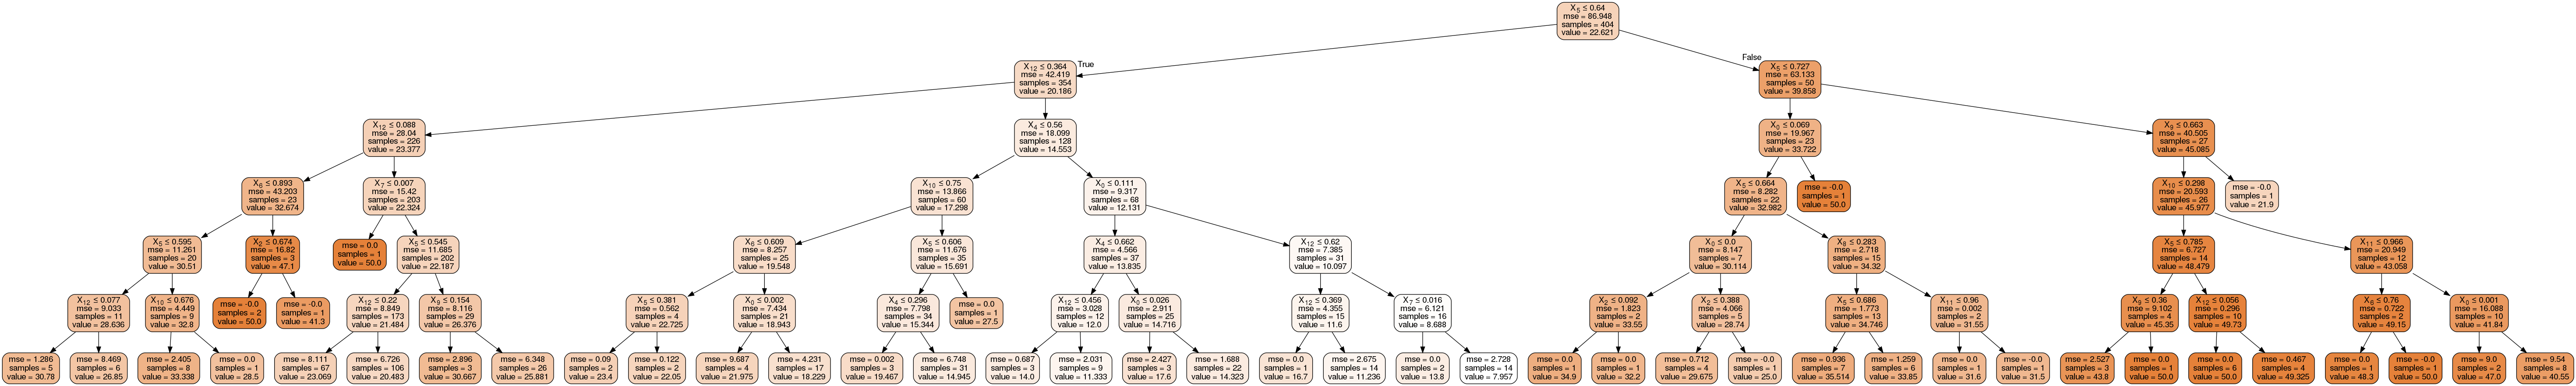

In [3]:
# 3，画图决策树：
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(model, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())